---
title: SAFE vs Zarr Metadata
subtitle: Learn how to extract metadata from SAFE (Standard Archive Format for Europe) in comparison to the EOPF Zarr using GDAL and Xarray for a sample Sentinel-2 L2A dataset
authors:
  - name: Suriyah Dhinakaran
    orcid: 0009-0007-0355-7372
    github: suriyahgit
    affiliations:
      - id: Eurac Research
        institution: Eurac Research
        ror: 01xt1w755
  - name: Michele Claus
    orcid: 0000-0003-3680-381X
    github: clausmichele
    affiliations:
      - id: Eurac Research
        institution: Eurac Research
        ror: 01xt1w755
date: 2025-03-20
thumbnail: https://raw.githubusercontent.com/EOPF-Sample-Service/eopf-sample-notebooks/refs/heads/main/notebooks/static/ESA_logo_2020_Deep.png
keywords : earth and related environmental sciences
releaseDate: 2025-03-20
datePublished: 2025-03-20
dateModified: 2025-03-20
---

```{image} ../static/ESA_EOPF_logo_2025_COLOR_ESA_blue_reduced.png
:alt: ESA EOPF Zarr Logo
:width: 250px
:align: center
```

## Table of Contents

1. [Introduction](#Introduction)
2. [Setup](#Setup)
3. [SAFE metadata extraction and interpretation with GDAL](#SAFE-metadata-extraction-and-interpretation-with-GDAL)
4. [Zarr metadata extraction and interpretation with GDAL](#Zarr-metadata-extraction-and-interpretation-with-GDAL)
5. [Zarr metadata extraction and interpretation with Xarray](#Zarr-metadata-extraction-and-interpretation-with-Xarray)

## Introduction

This notebook explores the most efficient techniques for extracting metadata from Sentinel-2 L2A data using GDAL for both Zarr and SAFE formats.
Additionally, it examines metadata extraction from Zarr using Xarray and highlights the metadata present in SAFE but absent in Zarr.

:::{hint} Overview
The **Zarr format** stores attributes differently to the **SAFE format** and therefore it's not straightforward to get some specific fields from them.
:::


## Setup
Start importing the necessary libraries

In [1]:
from osgeo import gdal
import xarray as xr

## SAFE metadata extraction and interpretation with GDAL

We will demonstrate how to use GDAL to extract the main metadata fields for Sentinel-2 L2A.  
The source file is a zip file hosted on an S3 object storage and we can get the information we need pointing to the specific `.xml` metadata file.  
This avoids downloading the full zip, which would take several GBs on your disk and some time to be downloaded. It is particulalry useful if we are only interested in the metadata.

In [2]:
# Open the Sentinel-2 SAFE metadata file using GDAL
file_path = "/vsizip//vsicurl/https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/safe-data/s2_msil2a/S2A_MSIL2A_20240101T102431_N0510_R065_T32TNT_20240101T144052.SAFE.zip/eodc/private/jrc_gfm/gfm_scratch/work/eopf/work/safe4eurac/data/S2A_MSIL2A_20240101T102431_N0510_R065_T32TNT_20240101T144052.SAFE/MTD_MSIL2A.xml"
dataset = gdal.Open(file_path)

# Extract metadata
metadata = dataset.GetMetadata()
print("Available metadata fields: ", metadata)

/home/mclaus@eurac.edu/micromamba/envs/eopf-zarr/lib/python3.11/site-packages/osgeo/gdal.py:311: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Available metadata fields:  {'AOT_QUANTIFICATION_VALUE': '1000.0', 'AOT_QUANTIFICATION_VALUE_UNIT': 'none', 'AOT_RETRIEVAL_ACCURACY': '0.0', 'AOT_RETRIEVAL_METHOD': 'CAMS', 'BOA_QUANTIFICATION_VALUE': '10000', 'BOA_QUANTIFICATION_VALUE_UNIT': 'none', 'CLOUDY_PIXEL_OVER_LAND_PERCENTAGE': '77.818626', 'CLOUD_COVERAGE_ASSESSMENT': '77.882135', 'CLOUD_SHADOW_PERCENTAGE': '0.118279', 'DARK_FEATURES_PERCENTAGE': '4.730594', 'DATATAKE_1_DATATAKE_SENSING_START': '2024-01-01T10:24:31.024Z', 'DATATAKE_1_DATATAKE_TYPE': 'INS-NOBS', 'DATATAKE_1_ID': 'GS2A_20240101T102431_044535_N05.10', 'DATATAKE_1_SENSING_ORBIT_DIRECTION': 'DESCENDING', 'DATATAKE_1_SENSING_ORBIT_NUMBER': '65', 'DATATAKE_1_SPACECRAFT_NAME': 'Sentinel-2A', 'DEGRADED_ANC_DATA_PERCENTAGE': '0.0', 'DEGRADED_MSI_DATA_PERCENTAGE': '0', 'FOOTPRINT': 'POLYGON((8.999733821898065 47.61803390438432, 9.040713853687311 47.61157789185866, 9.040874041856954 47.611996095819045, 9.041231250676285 47.61194006638127, 9.041342517540508 47.61222897317

### General Metadata

- Mission ID: Sentinel-2A, Sentinel-2B or Sentinel-2C
- Product ID: Unique identifier for the data product
- Product Type: (e.g., _S2MSI1C_ -> Level-1C, _S2MSI2A_ -> Level-2A)
- Processing Baseline: The software version used for processing
- Acquisition Start Time: Time when the sensor started acquiring data
- Acquisition Stop Time: Time when the sensor stopped acquiring data
- Processing Time: Time when the data was processed
- Cloud Cover Percentage: Estimated cloud coverage in the scene

In [3]:
mission_id = metadata.get("DATATAKE_1_SPACECRAFT_NAME", "N/A")
product_id = metadata.get("PRODUCT_URI", "N/A")
product_type = metadata.get("PRODUCT_TYPE", "N/A")
processing_baseline = metadata.get("PROCESSING_BASELINE", "N/A")
product_start_time = metadata.get("PRODUCT_START_TIME", "N/A")
product_stop_time = metadata.get("PRODUCT_STOP_TIME", "N/A")
processing_time = metadata.get("GENERATION_TIME", "N/A")
cloud_cover_percentage = metadata.get("CLOUD_COVERAGE_ASSESSMENT", "N/A")

print("General Metadata")
print(f"Mission ID: {mission_id}")
print(f"Product ID: {product_id}")
print(f"Product Type: {product_type}")
print(f"Processing Baseline: {processing_baseline}")
print(f"Acquisition Start Time: {product_start_time}")
print(f"Acquisition Stop Time: {product_stop_time}")
print(f"Processing Time: {processing_time}")
print(f"Cloud Cover Percentage: {cloud_cover_percentage}%")

General Metadata
Mission ID: Sentinel-2A
Product ID: S2A_MSIL2A_20240101T102431_N0510_R065_T32TNT_20240101T144052.SAFE
Product Type: S2MSI2A
Processing Baseline: 05.10
Acquisition Start Time: 2024-01-01T10:24:31.024Z
Acquisition Stop Time: 2024-01-01T10:24:31.024Z
Processing Time: 2024-01-01T14:40:52.000000Z
Cloud Cover Percentage: 77.882135%


### Acquisition & Geolocation

- Tile ID: Sentinel-2 tiling grid reference (e.g., T31TCH)
- Relative Orbit Number: Orbit number within the 10-day repeat cycle
- Latitude & Longitude Bounds: Bounding box coordinates of the scene

In [4]:
tile_id = metadata.get("PRODUCT_URI", "N/A").split("_")[-2]
relative_orbit_number = metadata.get("DATATAKE_1_SENSING_ORBIT_NUMBER", "N/A")
footprint = metadata.get("FOOTPRINT", "N/A")

print("\nAcquisition & Geolocation")
print(f"Tile ID: {tile_id}")
print(f"Relative Orbit Number: {relative_orbit_number}")
print(f"Latitude & Longitude Bounds: {footprint}")


Acquisition & Geolocation
Tile ID: T32TNT
Relative Orbit Number: 65
Latitude & Longitude Bounds: POLYGON((8.999733821898065 47.61803390438432, 9.040713853687311 47.61157789185866, 9.040874041856954 47.611996095819045, 9.041231250676285 47.61194006638127, 9.041342517540508 47.61222897317143, 9.1078563023732 47.60158516307183, 9.159570765657037 47.593299009436464, 9.356466782044505 47.56147598653704, 9.356474470934508 47.56149567639165, 9.358280118768738 47.56118290871272, 9.369648094799167 47.55934557666216, 9.369489145592196 47.55893881727785, 9.36958339340548 47.55892244357603, 9.369358989021771 47.55834480970852, 9.660561411790733 47.50777571469919, 9.660600017242835 47.507873340612335, 9.664016125797776 47.50727922435113, 9.664339998239244 47.50809692643702, 9.683445798391 47.504660350041135, 9.683354941461507 47.50443237013324, 9.971474461771376 47.45245351021518, 9.971624697391745 47.45282536829578, 9.98666617389741 47.45011984522383, 9.986275066326003 47.44914636513849, 9.986305

### Radiometric & Atmospheric Metadata

- Quantification Value: Scale factor to convert raw digital numbers (DN) to reflectance
- Radiometric Offset (introduced with processing baseline 5):
  - GDAL can't currently extract the metadata field `BOA_ADD_OFFSET`, which in the original `MTD_MSIL2A.xml` metadata file is a value specified for each band like this:  
   `<BOA_ADD_OFFSET band_id="0">-1000</BOA_ADD_OFFSET>`

The mentioned values are necessary to compute the Bottom-Of-Atmosphere (BOA) values from the Digital Numbers (DN) (values in the JPEG2000 files) with the following formula:  

$L2A\_BOA = (L2A\_DN + BOA\_ADD\_OFFSET) / QUANTIFICATION\_VALUE$

Acronyms:

BOA: Bottom-Of-Atmosphere  
AOT: Aerosol Optical Thickness  
WVP: Scene-average Water Vapour

In [5]:
# Extract values safely
quantification_value_BOA = metadata.get("BOA_QUANTIFICATION_VALUE", "")
quantification_value_AOT = metadata.get("AOT_QUANTIFICATION_VALUE", "")
quantification_value_WVP = metadata.get("WVP_QUANTIFICATION_VALUE", "")

# Define units if available
boa_unit = metadata.get("BOA_QUANTIFICATION_VALUE_UNIT", "").replace("none", "")
aot_unit = metadata.get("AOT_QUANTIFICATION_VALUE_UNIT", "").replace("none", "")
wvp_unit = metadata.get("WVP_QUANTIFICATION_VALUE_UNIT", "").replace("none", "")

print("\nRadiometric & Athmospheric Metadata")
print(f"BOA Quantification Value: {quantification_value_BOA} {boa_unit}")
print(f"AOT Quantification Value: {quantification_value_AOT} {aot_unit}")
print(f"WVP Quantification Value: {quantification_value_WVP} {wvp_unit}")


Radiometric & Athmospheric Metadata
BOA Quantification Value: 10000 
AOT Quantification Value: 1000.0 
WVP Quantification Value: 1000.0 cm


### Subdatasets

Here we can get a hint about the product structure, where different bands are available in different resolutions:

In [6]:
subdatasets = dataset.GetSubDatasets()
subdatasets

[('SENTINEL2_L2A:/vsizip//vsicurl/https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/safe-data/s2_msil2a/S2A_MSIL2A_20240101T102431_N0510_R065_T32TNT_20240101T144052.SAFE.zip/eodc/private/jrc_gfm/gfm_scratch/work/eopf/work/safe4eurac/data/S2A_MSIL2A_20240101T102431_N0510_R065_T32TNT_20240101T144052.SAFE/MTD_MSIL2A.xml:10m:EPSG_32632',
  'Bands B2, B3, B4, B8, AOT, WVP with 10m resolution, UTM 32N'),
 ('SENTINEL2_L2A:/vsizip//vsicurl/https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/safe-data/s2_msil2a/S2A_MSIL2A_20240101T102431_N0510_R065_T32TNT_20240101T144052.SAFE.zip/eodc/private/jrc_gfm/gfm_scratch/work/eopf/work/safe4eurac/data/S2A_MSIL2A_20240101T102431_N0510_R065_T32TNT_20240101T144052.SAFE/MTD_MSIL2A.xml:20m:EPSG_32632',
  'Bands B5, B6, B7, B8A, B11, B12, AOT, CLD, SCL, SNW, WVP with 20m resolution, UTM 32N'),
 ('SENTINEL2_L2A:/vsizip//vsicurl/https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/sa

## Zarr metadata extraction and interpretation with GDAL

We will demonstrate how to use GDAL to extract the main metadata fields for Sentinel-2 L2A.  
The source file is now a Zarr file, which is the result of the original SAFE product converted using the [eopf](https://gitlab.eopf.copernicus.eu/cpm/eopf-cpm) library. 

In [ ]:
zarr_path = 'ZARR:"/vsicurl/https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S2A_MSIL2A_20240101T102431_N0510_R065_T32TNT_20240101T144052.zarr"'
try:
    dataset = gdal.OpenEx(
        zarr_path,
        gdal.OF_MULTIDIM_RASTER,
    )
    root_group = dataset.GetRootGroup()
    attributes = {}
    for attribute in root_group.GetAttributes():
        attributes[attribute.GetName()] = attribute.Read()
except RuntimeError as e:
    print(f"GDAL Error: {e}")

attributes.keys()

dict_keys(['other_metadata', 'stac_discovery'])

### General Metadata

- Mission ID: Sentinel-2A, Sentinel-2B or Sentinel-2C
- Product ID: Unique identifier for the data product
- Product Type: (e.g., _S2MSI1C_ -> Level-1C, _S2MSI2A_ -> Level-2A)
- Processing Baseline: The software version used for processing
- Acquisition Start Time: Time when the sensor started acquiring data
- Acquisition Stop Time: Time when the sensor stopped acquiring data
- Processing Time: Time when the data was processed
- Cloud Cover Percentage: Estimated cloud coverage in the scene

In [8]:
mission_id = attributes["stac_discovery"]["properties"]["platform"]
product_id = attributes["stac_discovery"]["id"]
product_type = attributes["stac_discovery"]["properties"]["processing:level"]
processing_baseline = attributes["stac_discovery"]["properties"]["eopf:baseline"]
product_start_time = attributes["stac_discovery"]["properties"]["start_datetime"]
product_stop_time = attributes["stac_discovery"]["properties"]["end_datetime"]
processing_time = attributes["stac_discovery"]["properties"]["created"]
cloud_cover = attributes["stac_discovery"]["properties"]["eo:cloud_cover"]

print("General Metadata")
print(f"Mission ID: {mission_id}")
print(f"Product ID: {product_id}")
print(f"Product Type: {product_type}")
print(f"Processing Baseline: {processing_baseline}")
print(f"Acquisition Start Time: {product_start_time}")
print(f"Acquisition Stop Time: {product_stop_time}")
print(f"Processing Time: {processing_time}")
print(f"Cloud Cover Percentage: {cloud_cover} %")

General Metadata
Mission ID: sentinel-2a
Product ID: S2A_MSIL2A_20240101T102431_N0510_R065_T32TNT_20240101T144052.SAFE
Product Type: L2A
Processing Baseline: 05.10
Acquisition Start Time: 2024-01-01T10:24:31.024000+00:00
Acquisition Stop Time: 2024-01-01T10:24:31.024000+00:00
Processing Time: 2024-01-01T14:40:52+00:00
Cloud Cover Percentage: 77.882135 %


### Acquisition & Geolocation

- Tile ID: Sentinel-2 tiling grid reference (e.g., T31TCH)
- Relative Orbit Number: Orbit number within the 10-day repeat cycle
- Latitude & Longitude Bounds: Bounding box coordinates of the scene
- Mean Sun Zenith Angle: Average sun elevation during acquisition
- Mean Sun Azimuth Angle: Average sun azimuth angle during acquisition

In [9]:
tile_id = attributes["stac_discovery"]["id"].split("_")[-2]
relative_orbit_number = attributes["stac_discovery"]["properties"]["sat:relative_orbit"]
bbox = attributes["stac_discovery"]["bbox"]
mean_sun_zenith_angle = attributes["other_metadata"][
    "mean_sun_zenith_angle_in_deg_for_all_bands_all_detectors"
]
mean_sun_azimuth_angle = attributes["other_metadata"][
    "mean_sun_azimuth_angle_in_deg_for_all_bands_all_detectors"
]

print("\nAcquisition & Geolocation")
print(f"Tile ID: {tile_id}")
print(f"Relative Orbit Number: {relative_orbit_number}")
print(f"BBOX: {bbox}")
print(f"Mean Sun Zenith Angle: {mean_sun_zenith_angle}")
print(f"Mean Sun Azimuth Angle: {mean_sun_azimuth_angle}")


Acquisition & Geolocation
Tile ID: T32TNT
Relative Orbit Number: 65
BBOX: [10.453951484713707, 46.85663988190739, 8.999733821898065, 47.61803390438432]
Mean Sun Zenith Angle: 71.5320434839285
Mean Sun Azimuth Angle: 166.26310268032


### Spectral Bands Information

- Bands List: Names of available bands (e.g., B01–B12)
- Wavelength Range: Central wavelength and bandwidth for each band
- Spatial Resolution: 10m, 20m, or 60m depending on the band

In [10]:
print("\nSpectral & Band Information")

bands = attributes["stac_discovery"]["properties"]["bands"]
resolution_mapping = attributes["stac_discovery"]["properties"]["eopf:resolutions"]

# Process the resolution mapping into a dictionary where band names are the keys
formatted_resolution_mapping = {}
for key, value in resolution_mapping.items():
    band_names = key.replace("bands ", "").split(", ")
    for band in band_names:
        band = band.strip().lower()  # Standardize case and remove spaces
        if (
            band.isdigit() or band == "8a"
        ):  # Ensure "b" prefix for numerical bands & "8a"
            band = f"b{band}"
        formatted_resolution_mapping[band] = value + "m"

# Loop through bands and print with resolution
for band in bands:
    band_name = band["name"].strip().lower()  # Ensure matching format
    central_wavelength = band["center_wavelength"]
    resolution = formatted_resolution_mapping.get(band_name, "Unknown")

    print(
        f"Band Name: {band_name}, Central Wavelength: {central_wavelength} nm, Resolution: {resolution}"
    )


Spectral & Band Information
Band Name: b01, Central Wavelength: 442.7 nm, Resolution: 60m
Band Name: b02, Central Wavelength: 492.7 nm, Resolution: 10m
Band Name: b03, Central Wavelength: 559.8 nm, Resolution: 10m
Band Name: b04, Central Wavelength: 664.6 nm, Resolution: 10m
Band Name: b05, Central Wavelength: 704.1 nm, Resolution: 20m
Band Name: b06, Central Wavelength: 740.5 nm, Resolution: 20m
Band Name: b07, Central Wavelength: 782.8 nm, Resolution: 20m
Band Name: b08, Central Wavelength: 832.8 nm, Resolution: 10m
Band Name: b8a, Central Wavelength: 864.7 nm, Resolution: 20m
Band Name: b09, Central Wavelength: 945.1 nm, Resolution: 60m
Band Name: b10, Central Wavelength: 1373.5 nm, Resolution: 60m
Band Name: b11, Central Wavelength: 1613.7 nm, Resolution: 20m
Band Name: b12, Central Wavelength: 2202.4 nm, Resolution: 20m


## Zarr metadata extraction and interpretation with Xarray

We finally access the metadata using the Xarray Python library, which support opening Zarr products and can also be used to process the data easily.

In [11]:
ds = xr.open_zarr(
    "https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S2A_MSIL2A_20240101T102431_N0510_R065_T32TNT_20240101T144052.zarr",
    consolidated=True,
)

/home/mclaus@eurac.edu/micromamba/envs/eopf-zarr/lib/python3.11/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


### General Metadata

- Mission ID: Sentinel-2A, Sentinel-2B or Sentinel-2C
- Product ID: Unique identifier for the data product
- Product Type: (e.g., _S2MSI1C_ -> Level-1C, _S2MSI2A_ -> Level-2A)
- Processing Baseline: The software version used for processing
- Acquisition Start Time: Time when the sensor started acquiring data
- Acquisition Stop Time: Time when the sensor stopped acquiring data
- Processing Time: Time when the data was processed
- Cloud Cover Percentage: Estimated cloud coverage in the scene

In [12]:
mission_id = ds.attrs["stac_discovery"]["properties"]["platform"]
product_id = ds.attrs["stac_discovery"]["id"]
product_type = ds.attrs["stac_discovery"]["properties"]["processing:level"]
processing_baseline = ds.attrs["stac_discovery"]["properties"]["eopf:baseline"]
product_start_time = ds.attrs["stac_discovery"]["properties"]["start_datetime"]
product_stop_time = ds.attrs["stac_discovery"]["properties"]["end_datetime"]
processing_time = ds.attrs["stac_discovery"]["properties"]["created"]
cloud_cover = ds.attrs["stac_discovery"]["properties"]["eo:cloud_cover"]

print("General Metadata")
print(f"Mission ID: {mission_id}")
print(f"Product ID: {product_id}")
print(f"Product Type: {product_type}")
print(f"Processing Baseline: {processing_baseline}")
print(f"Acquisition Start Time: {product_start_time}")
print(f"Acquisition Stop Time: {product_stop_time}")
print(f"Processing Time: {processing_time}")
print(f"Cloud Cover Percentage: {cloud_cover} %")

General Metadata
Mission ID: sentinel-2a
Product ID: S2A_MSIL2A_20240101T102431_N0510_R065_T32TNT_20240101T144052.SAFE
Product Type: L2A
Processing Baseline: 05.10
Acquisition Start Time: 2024-01-01T10:24:31.024000+00:00
Acquisition Stop Time: 2024-01-01T10:24:31.024000+00:00
Processing Time: 2024-01-01T14:40:52+00:00
Cloud Cover Percentage: 77.882135 %


### Acquisition & Geolocation

- Tile ID: Sentinel-2 tiling grid reference (e.g., T31TCH)
- Relative Orbit Number: Orbit number within the 10-day repeat cycle
- Latitude & Longitude Bounds: Bounding box coordinates of the scene
- Mean Sun Zenith Angle: Average sun elevation during acquisition
- Mean Sun Azimuth Angle: Average sun azimuth angle during acquisition

In [13]:
tile_id = ds.attrs["stac_discovery"]["id"].split("_")[-2]
relative_orbit_number = ds.attrs["stac_discovery"]["properties"]["sat:relative_orbit"]
bbox = ds.attrs["stac_discovery"]["bbox"]
mean_sun_zenith_angle = ds.other_metadata[
    "mean_sun_zenith_angle_in_deg_for_all_bands_all_detectors"
]
mean_sun_azimuth_angle = ds.other_metadata[
    "mean_sun_azimuth_angle_in_deg_for_all_bands_all_detectors"
]

print("\nAcquisition & Geolocation")
print(f"Tile ID: {tile_id}")
print(f"Relative Orbit Number: {relative_orbit_number}")
print(f"BBOX: {bbox}")
print(f"Mean Sun Zenith Angle: {mean_sun_zenith_angle}")
print(f"Mean Sun Azimuth Angle: {mean_sun_azimuth_angle}")


Acquisition & Geolocation
Tile ID: T32TNT
Relative Orbit Number: 65
BBOX: [10.453951484713707, 46.85663988190739, 8.999733821898065, 47.61803390438432]
Mean Sun Zenith Angle: 71.5320434839285
Mean Sun Azimuth Angle: 166.26310268032


### Spectral Bands Information

- Bands List: Names of available bands (e.g., B01–B12)
- Wavelength Range: Central wavelength and bandwidth for each band
- Spatial Resolution: 10m, 20m, or 60m depending on the band

In [14]:
bands = ds.attrs["stac_discovery"]["properties"]["bands"]
resolution_mapping = ds.attrs["stac_discovery"]["properties"]["eopf:resolutions"]

# Process the resolution mapping into a dictionary where band names are the keys
formatted_resolution_mapping = {}
for key, value in resolution_mapping.items():
    band_names = key.replace("bands ", "").split(", ")
    for band in band_names:
        band = band.strip().lower()  # Standardize case and remove spaces
        if (
            band.isdigit() or band == "8a"
        ):  # Ensure "b" prefix for numerical bands & "8a"
            band = f"b{band}"
        formatted_resolution_mapping[band] = value + "m"

print("Spectral Bands Information")
# Loop through bands and print with resolution
for band in bands:
    band_name = band["name"].strip().lower()  # Ensure matching format
    central_wavelength = band["center_wavelength"]
    resolution = formatted_resolution_mapping.get(band_name, "Unknown")

    print(
        f"Band Name: {band_name}, Central Wavelength: {central_wavelength} nm, Resolution: {resolution}"
    )

Spectral Bands Information
Band Name: b01, Central Wavelength: 442.7 nm, Resolution: 60m
Band Name: b02, Central Wavelength: 492.7 nm, Resolution: 10m
Band Name: b03, Central Wavelength: 559.8 nm, Resolution: 10m
Band Name: b04, Central Wavelength: 664.6 nm, Resolution: 10m
Band Name: b05, Central Wavelength: 704.1 nm, Resolution: 20m
Band Name: b06, Central Wavelength: 740.5 nm, Resolution: 20m
Band Name: b07, Central Wavelength: 782.8 nm, Resolution: 20m
Band Name: b08, Central Wavelength: 832.8 nm, Resolution: 10m
Band Name: b8a, Central Wavelength: 864.7 nm, Resolution: 20m
Band Name: b09, Central Wavelength: 945.1 nm, Resolution: 60m
Band Name: b10, Central Wavelength: 1373.5 nm, Resolution: 60m
Band Name: b11, Central Wavelength: 1613.7 nm, Resolution: 20m
Band Name: b12, Central Wavelength: 2202.4 nm, Resolution: 20m


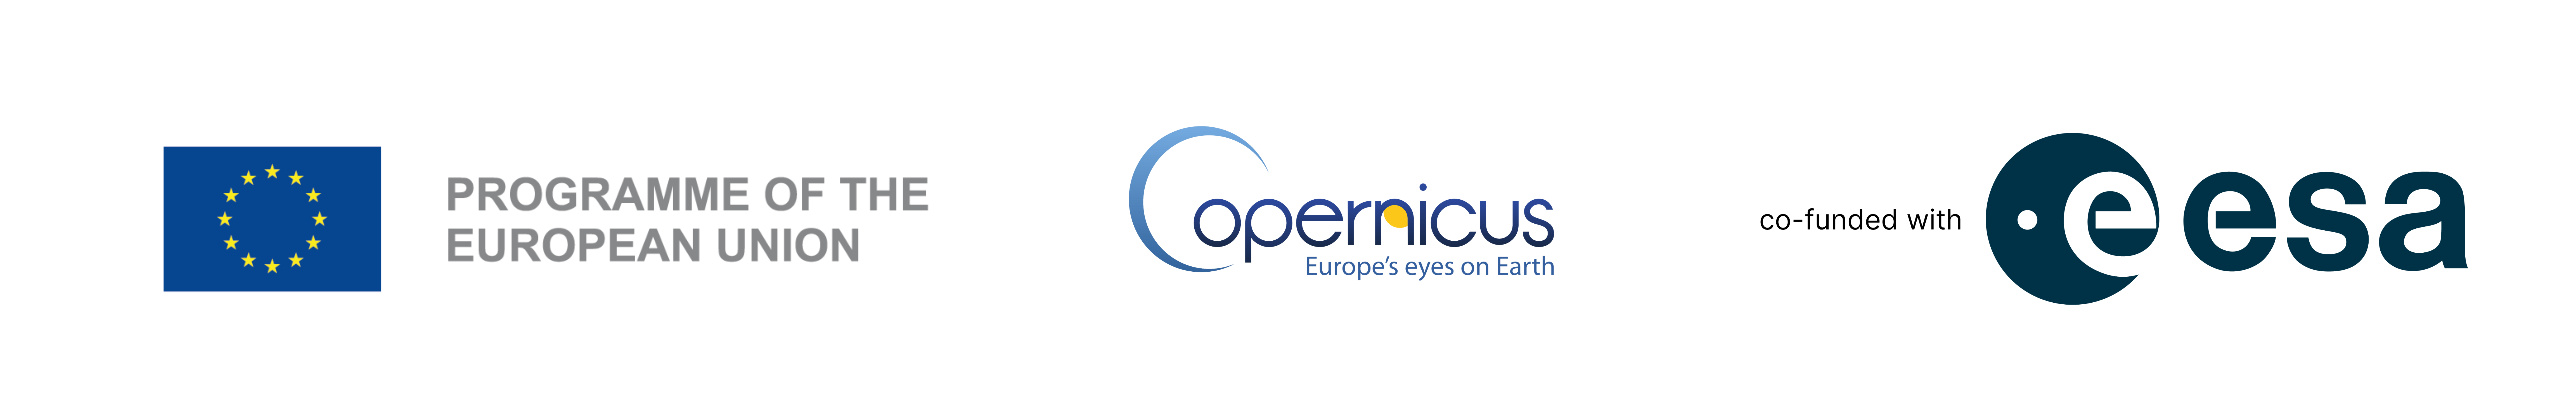